# T90 - Hardness Ratio

This notebook processes all catalogues _(CGRO/BATSE, FERMI/GBM, SWIFT/BAT)_ in T90-Spectral Hardness feature space. On each catalogue, it performs statistical calculations to assess the performance of the models individually. Then cross-compares the models created using each dataset.

Importing necessary packages.

In [100]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
# add grbttools to path
import sys

sys.path.append("../")

import warnings
from grbtools import data as data_operations
from grbtools import disp as disp_operations
from grbtools import stats as stats_operations
from grbtools import models as model_operations
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(font_scale=1, style="whitegrid")
warnings.filterwarnings("ignore")
np.random.seed(1773)

Setting global variables.

In [102]:
features = ["lgT90", "lgHrd"]

cat_batse = "batse"
cat_fermi = "fermi"
cat_swift = "swift"

## 1. BATSE

Loading the data where the outliers are eliminated. A summary of data is printed and the data is plotted.

,lgT90,lgHrd
count,1924.000000,1924.000000
mean,1.023104,0.625694
std,0.903752,0.406057
min,-1.552842,-0.692426
25%,0.415039,0.364454
50%,1.283301,0.624354
75%,1.696112,0.905936
max,2.828546,1.999578


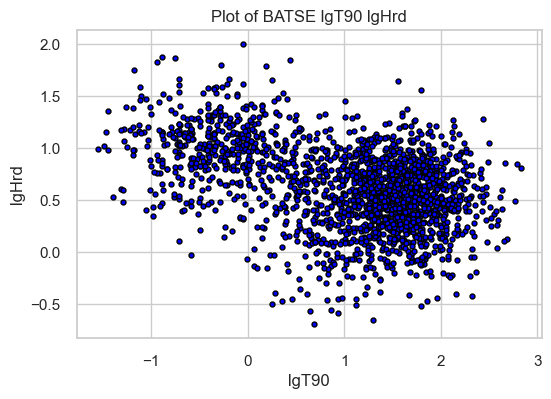

In [103]:
df_batse_t90_hrd = data_operations.load(
    cat_name=cat_batse,
    feats=features.copy(),
    without_outliers=True,
    plot_data=True,
    verbose=False,
)
df_batse_t90_hrd.describe()

Creating models. 10 models with clusters from 1 to 10 have been created and saved. 
- The clusters are sorted based on the means on the x-axis. In other words, the cluster with the lowest mean on x-axis is named as "Cluster 1", and the rest is sorted according to the increasing mean on x-axis.
- Covariance type is "full".
- "max_iter" and "n_init" parameters of GMM are set to 10000 and 100, respectively.


In [104]:
model_operations.createGMMs(
    dataset_name=cat_batse,
    data=df_batse_t90_hrd,
    cov_type="full",
    n_clusters_max=10,
    verbose=False,
    max_iter=10000,
    n_init=100,
    sorting_clusters=True,
    plot_model=False,
)

All models are successfully created.


Plotting the models with cluster decision boundaries. The clusters are sorted accoding to the means of the features on the x-axis.

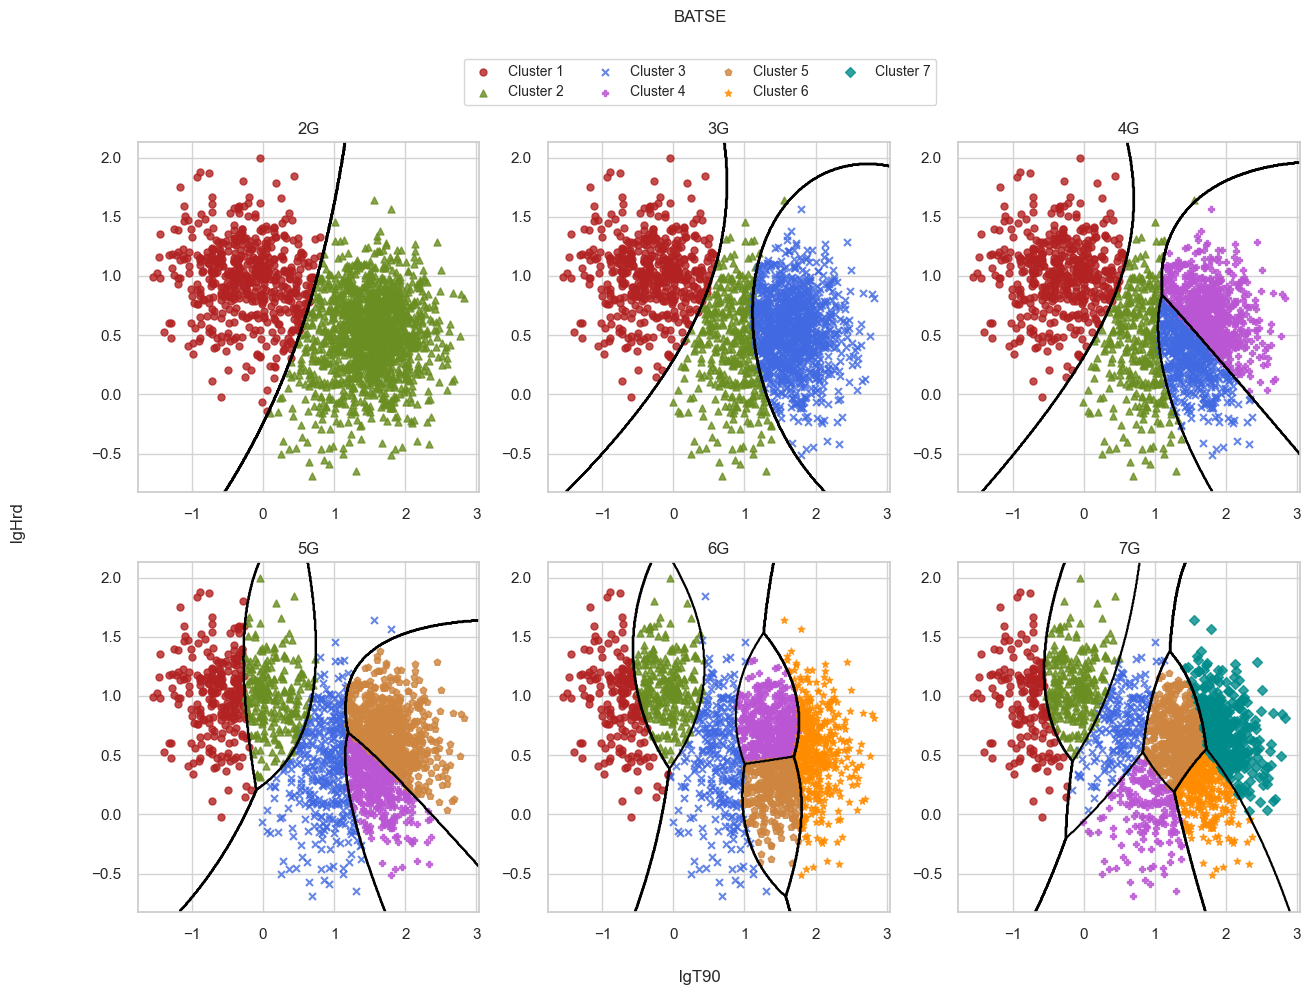

In [105]:
disp_operations.plot_models_as_grid(cat_name=cat_batse, data = df_batse_t90_hrd, feat_space=features.copy())

Evaluating the performance: AIC, BIC, WCSS, Silhouette scores, Gap statistics, Davies-Bouldin, and Calinski-Harabsz scores are calculated and plotted. Each metric is arranged according to "higher-is-better" logic.

In [124]:
scores, normalized_scores = stats_operations.perform_statistical_tests(df_batse_t90_hrd, features.copy(), cat_batse)
scores

,aic,bic,chs,dbs,gap,sil_euc,sil_mah,wcss
k,,,,,,,,
2,-6001.99,-6063.17,3671.08,-0.58,0,0.59,0.66,-648.69
3,-5953.89,-6048.45,2979.44,-0.90,0,0.41,0.58,-460.20
4,-5954.02,-6081.95,2414.52,-1.10,0,0.32,0.54,-395.52
5,-5961.03,-6122.33,2257.12,-1.09,0,0.28,0.50,-330.90
6,-5971.51,-6166.19,2243.25,-0.97,0,0.30,0.47,-275.66
7,-5974.45,-6202.50,2337.76,-0.94,0,0.32,0.47,-226.97
8,-5982.00,-6243.42,2200.72,-0.97,0,0.30,0.47,-208.81
9,-5987.65,-6282.45,2070.73,-1.04,0,0.30,0.46,-195.61
10,-5994.54,-6322.71,2045.75,-0.99,0,0.29,0.45,-177.76


The scores are plotted. The numbers are arranged in a way that higher values indicate better performance. X-axis is the number of clusters, y-axis is the scores.

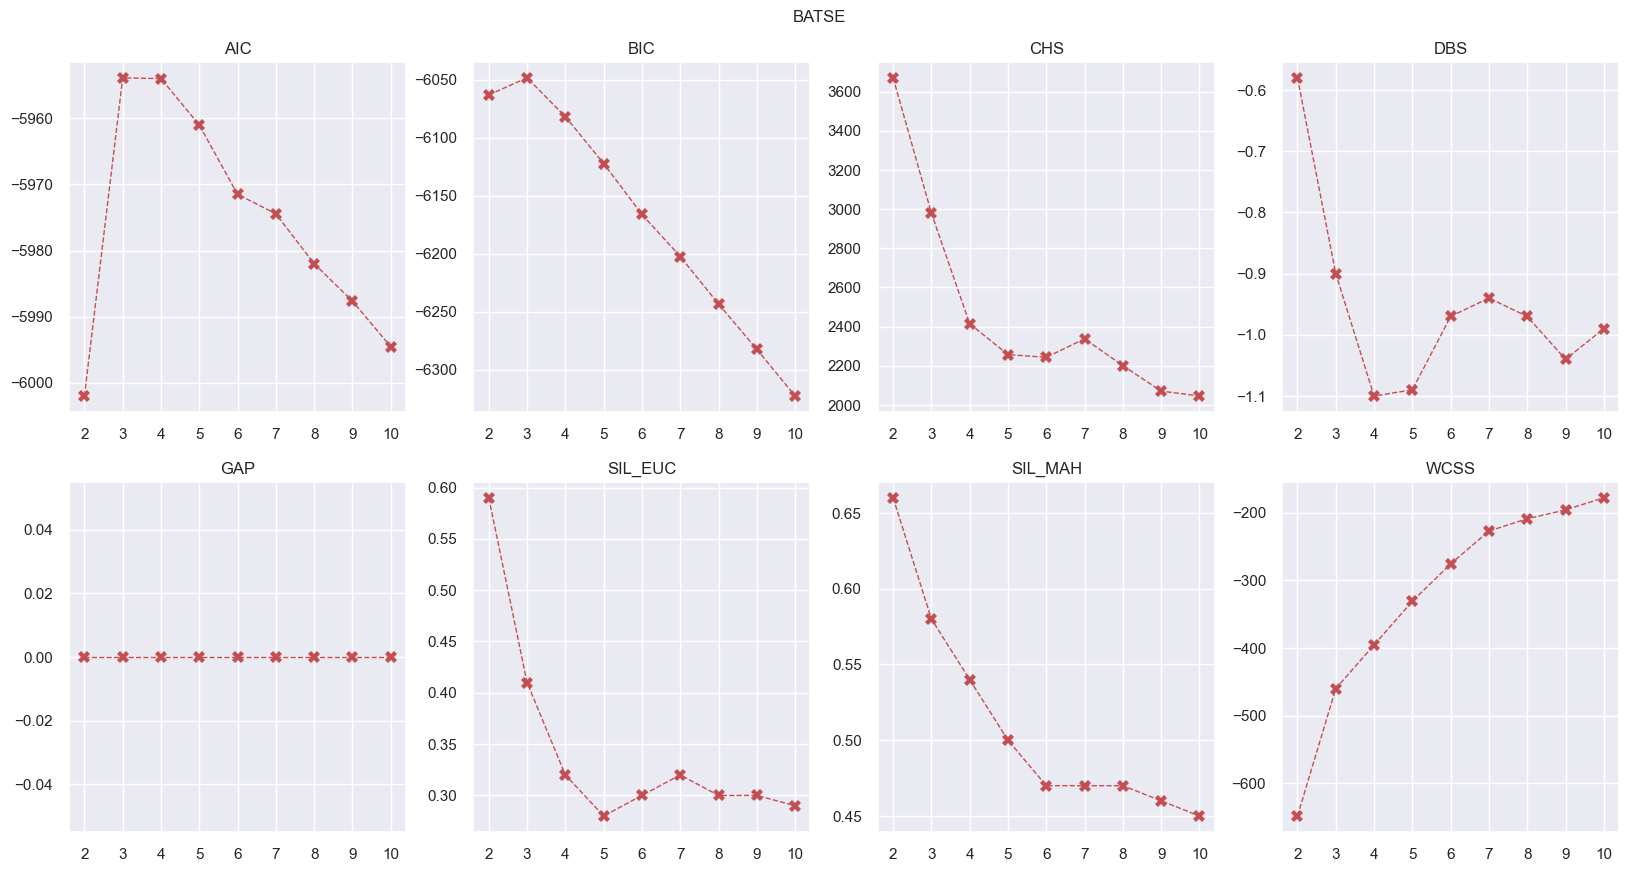

In [125]:
disp_operations.plot_scores_as_grid(scores, cat_batse)

Heatmap of the scores:

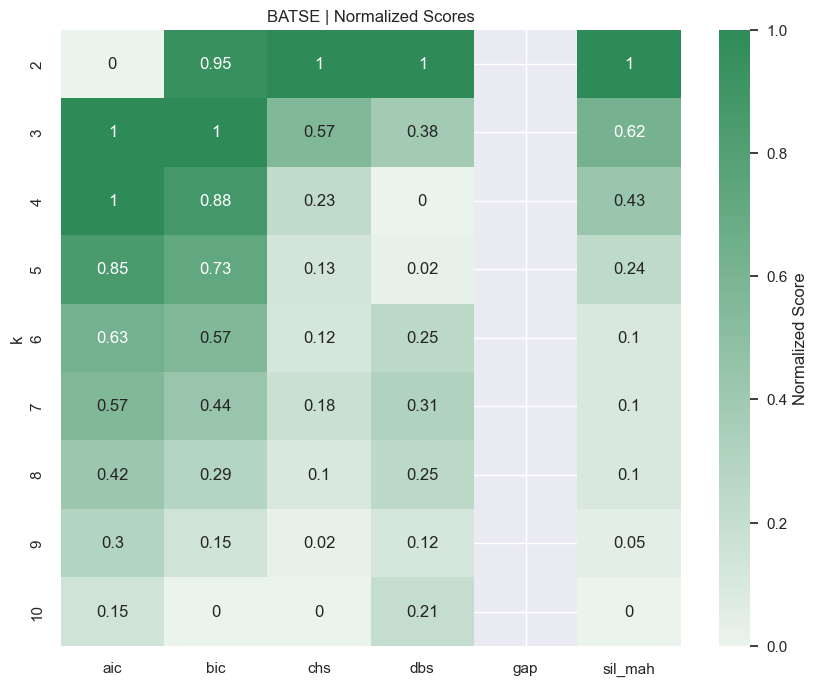

In [126]:
disp_operations.plot_heatmap(normalized_scores, cat_batse)

----

## 2. FERMI

Loading the data where the outliers are eliminated. A summary of data is printed and the data is plotted.

,lgT90,lgHrd
count,2291.000000,2291.000000
mean,1.133155,0.584350
std,0.778158,0.346653
min,-1.494850,-0.746089
25%,0.779283,0.359175
50%,1.316725,0.574944
75%,1.670700,0.798667
max,2.918383,2.037996


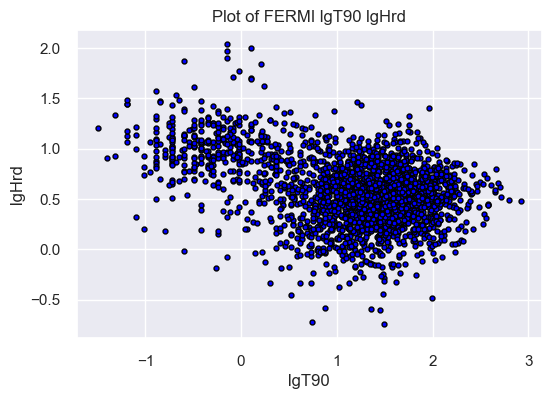

In [109]:
df_fermi_t90_hrd = data_operations.load(
    cat_name=cat_fermi,
    feats=features.copy(),
    without_outliers=True,
    plot_data=True,
    verbose=False,
)
df_fermi_t90_hrd.describe()

Creating models. 10 models with clusters from 1 to 10 have been created and saved. 
- The clusters are sorted based on the means on the x-axis. In other words, the cluster with the lowest mean on x-axis is named as "Cluster 1", and the rest is sorted according to the increasing mean on x-axis.
- Covariance type is "full".
- "max_iter" and "n_init" parameters of GMM are set to 10000 and 100, respectively.


In [110]:
model_operations.createGMMs(
    dataset_name=cat_fermi,
    data=df_fermi_t90_hrd,
    cov_type="full",
    n_clusters_max=10,
    verbose=False,
    max_iter=10000,
    n_init=100,
    sorting_clusters=True,
    plot_model=False,
)

All models are successfully created.


Plotting the models with cluster decision boundaries. The clusters are sorted accoding to the means of the features on the x-axis.

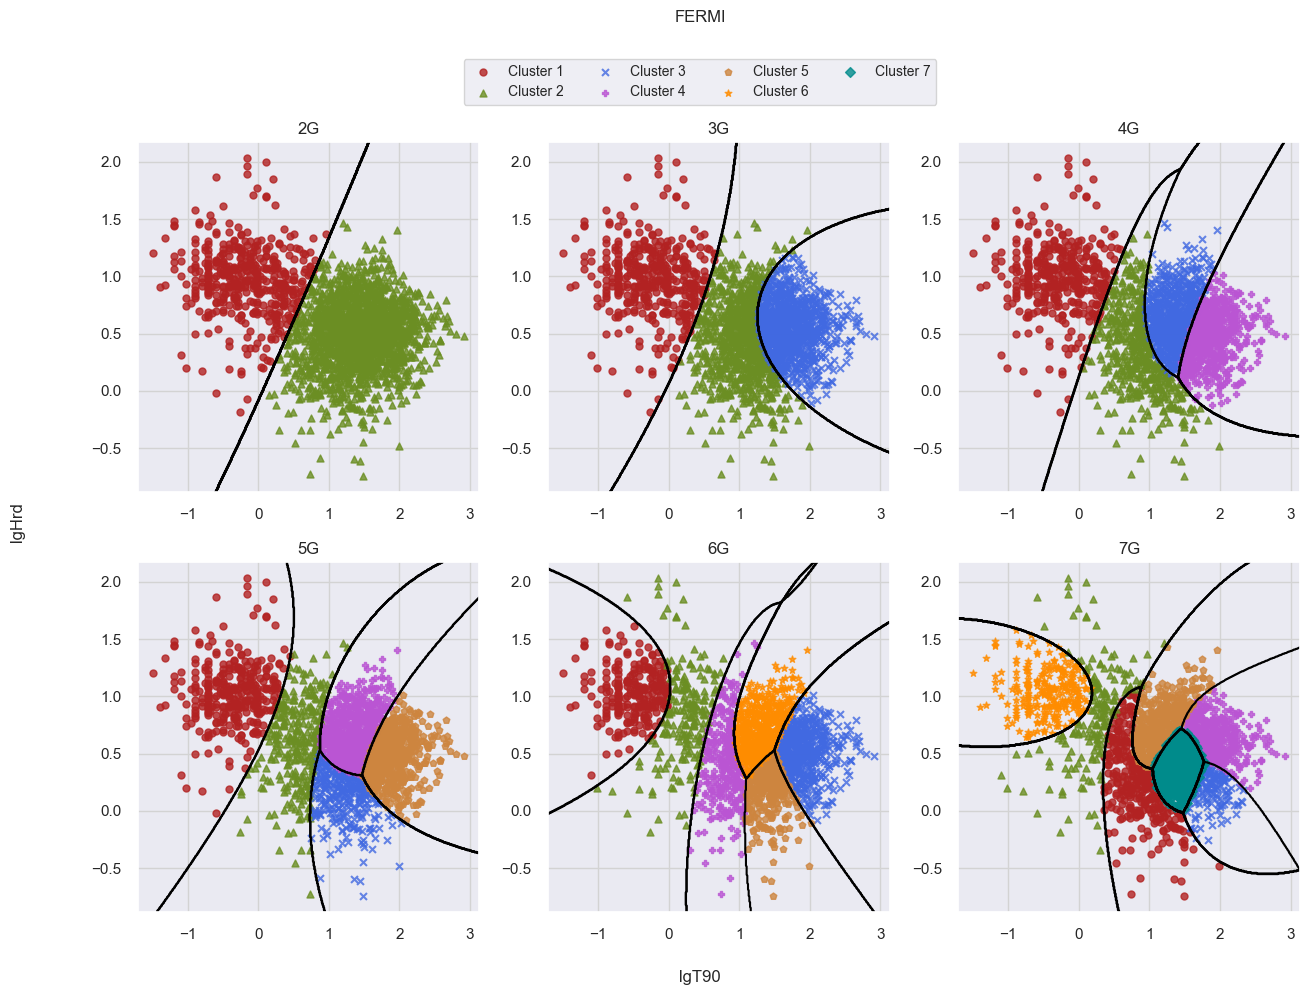

In [111]:
disp_operations.plot_models_as_grid(cat_name=cat_fermi, data = df_fermi_t90_hrd, feat_space=features)

Evaluating the performance: AIC, BIC, WCSS, Silhouette scores, Gap statistics, Davies-Bouldin, and Calinski-Harabsz scores are calculated and plotted. Each metric is arranged according to "higher-is-better" logic.

In [127]:
scores, normalized_scores = stats_operations.perform_statistical_tests(df_fermi_t90_hrd, features, cat_fermi)
normalized_scores

,aic,bic,chs,dbs,gap,sil_euc,sil_mah,wcss
k,,,,,,,,
2,0.00,0.90,1.00,1.00,NaN,1.00,1.00,0.00
3,0.86,1.00,0.87,0.71,NaN,0.38,0.52,0.48
4,0.76,0.83,0.54,0.58,NaN,0.19,0.41,0.63
5,0.66,0.65,0.48,0.69,NaN,0.22,0.41,0.77
6,0.71,0.52,0.33,0.63,NaN,0.16,0.37,0.84
7,1.00,0.45,0.00,0.51,NaN,0.00,0.11,0.82
8,0.88,0.27,0.17,0.64,NaN,0.09,0.26,0.94
9,0.94,0.14,0.12,0.00,NaN,0.12,0.00,0.97
10,0.95,0.00,0.06,0.17,NaN,0.09,0.00,1.00


The scores are plotted. The numbers are arranged in a way that higher values indicate better performance. X-axis is the number of clusters, y-axis is the scores.

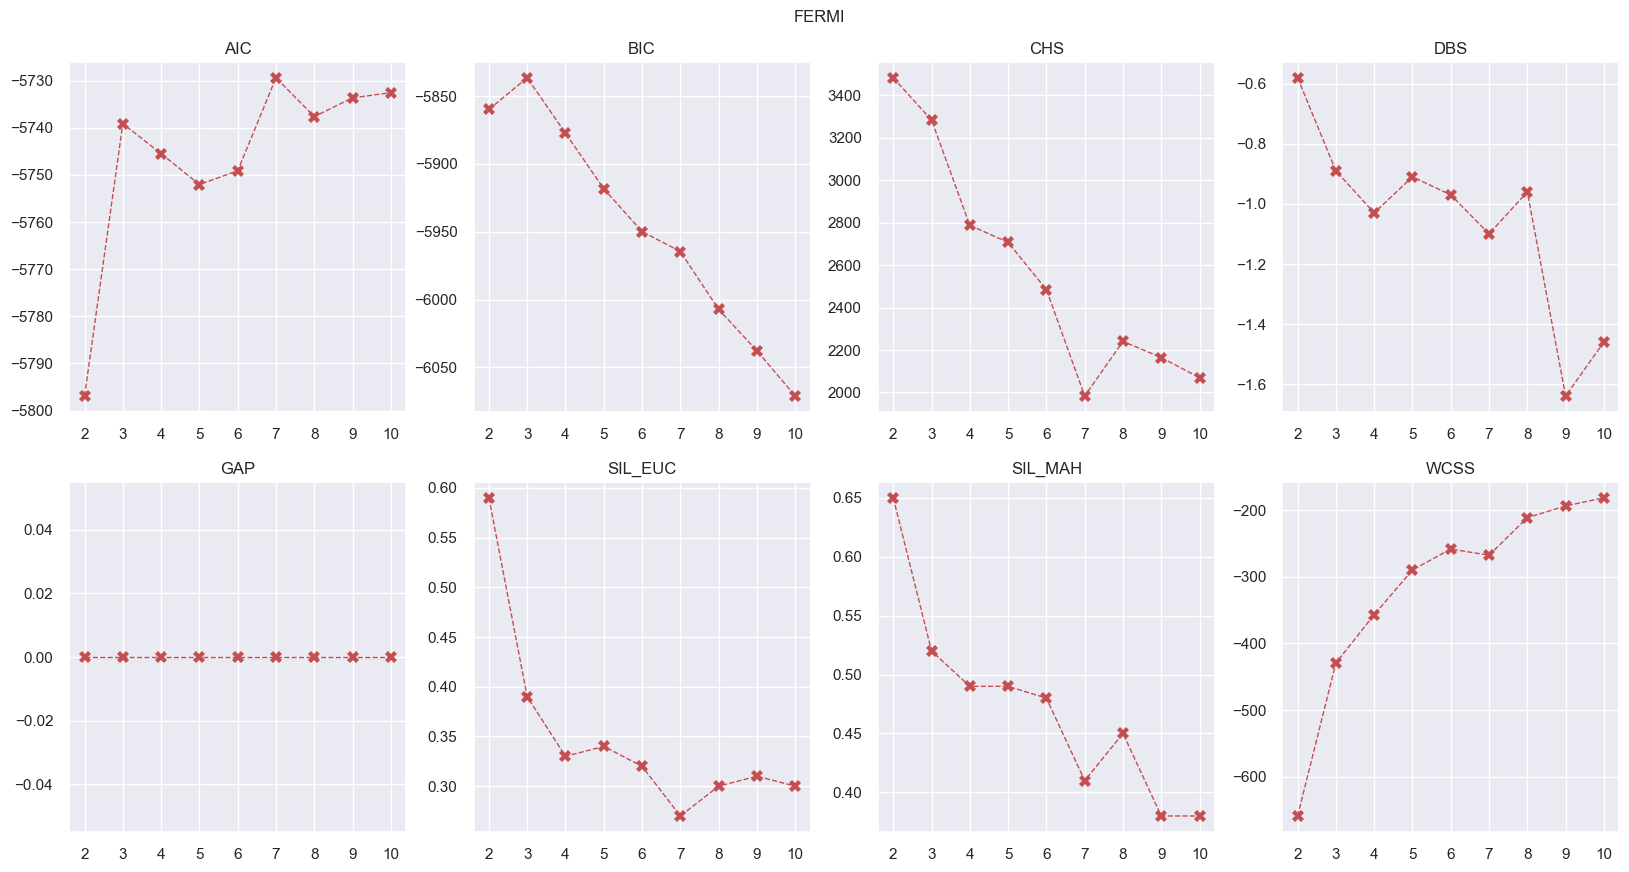

In [128]:
disp_operations.plot_scores_as_grid(scores, cat_fermi)

Heatmap of the scores:

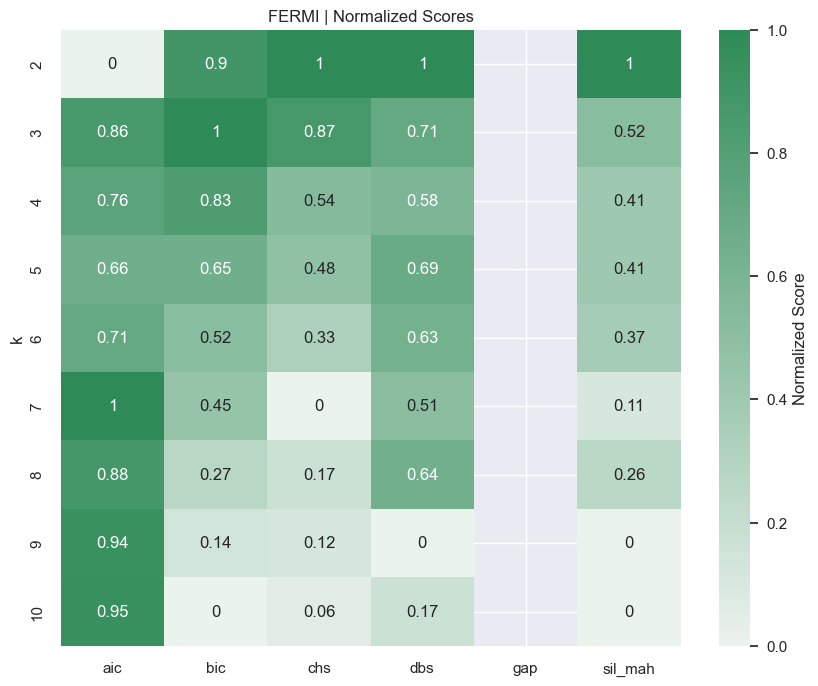

In [129]:
disp_operations.plot_heatmap(normalized_scores, cat_fermi)

-----

## 3. SWIFT

Loading the data where the outliers are eliminated. A summary of data is printed and the data is plotted.

,lgT90,lgHrd
count,1470.000000,1470.000000
mean,1.443412,-0.027163
std,0.782779,0.208473
min,-1.443698,-0.874140
25%,1.049218,-0.157182
50%,1.615424,-0.022055
75%,1.989075,0.113570
max,2.918150,0.660850


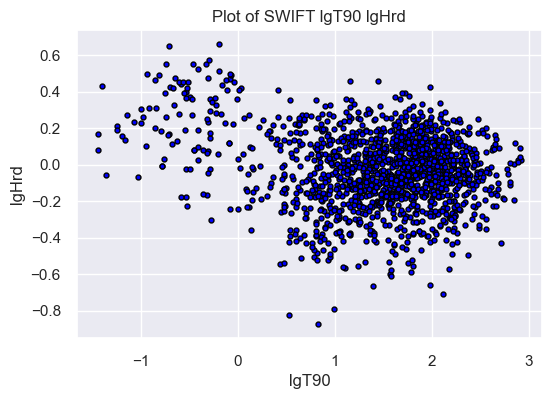

In [115]:
df_swift_t90_hrd = data_operations.load(
    cat_name=cat_swift,
    feats=features.copy(),
    without_outliers=True,
    plot_data=True,
    verbose=False,
)
df_swift_t90_hrd.describe()

Creating models. 10 models with clusters from 1 to 10 have been created and saved. 
- The clusters are sorted based on the means on the x-axis. In other words, the cluster with the lowest mean on x-axis is named as "Cluster 1", and the rest is sorted according to the increasing mean on x-axis.
- Covariance type is "full".
- "max_iter" and "n_init" parameters of GMM are set to 10000 and 100, respectively.


In [116]:
model_operations.createGMMs(
    dataset_name=cat_swift,
    data=df_swift_t90_hrd,
    cov_type="full",
    n_clusters_max=10,
    verbose=False,
    max_iter=10000,
    n_init=100,
    sorting_clusters=True,
    plot_model=False,
)

All models are successfully created.


Plotting the models with cluster decision boundaries. The clusters are sorted accoding to the means of the features on the x-axis.

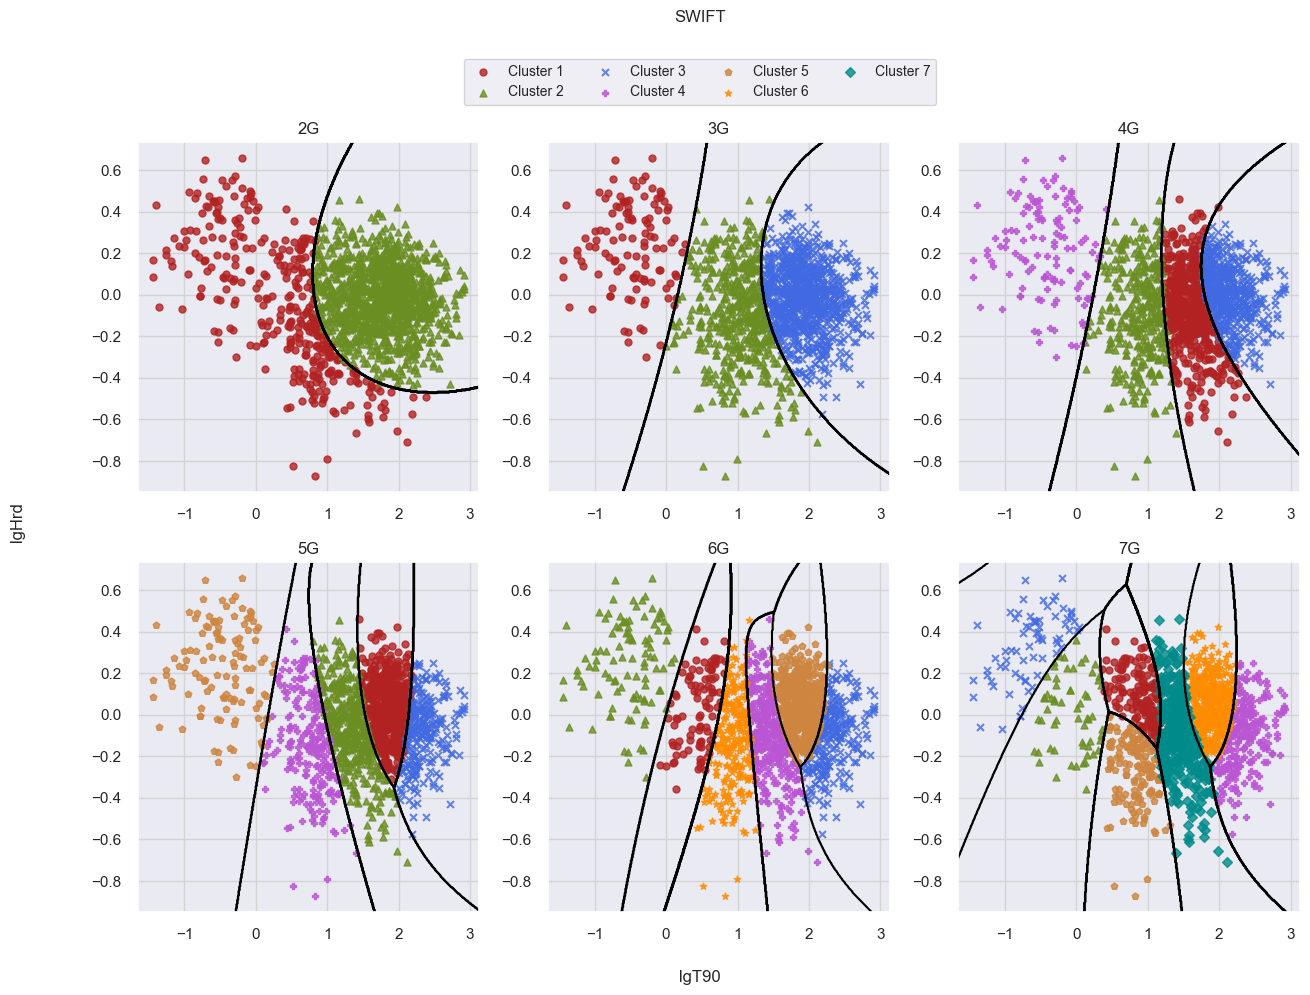

In [117]:
disp_operations.plot_models_as_grid(cat_name=cat_swift, data = df_swift_t90_hrd, feat_space=features)

Evaluating the performance: AIC, BIC, WCSS, Silhouette scores, Gap statistics, Davies-Bouldin, and Calinski-Harabsz scores are calculated and plotted. Each metric is arranged according to "higher-is-better" logic.

In [130]:
scores, normalized_scores = stats_operations.perform_statistical_tests(df_swift_t90_hrd, features, cat_swift)
normalized_scores

,aic,bic,chs,dbs,gap,sil_euc,sil_mah,wcss
k,,,,,,,,
2,0.00,0.87,0.00,0.59,NaN,1.00,0.75,0.00
3,1.00,1.00,0.89,1.00,NaN,0.89,1.00,0.61
4,0.89,0.84,1.00,0.62,NaN,0.32,0.62,0.78
5,0.92,0.71,0.87,0.51,NaN,0.21,0.50,0.85
6,0.98,0.59,0.82,0.38,NaN,0.11,0.50,0.90
7,0.97,0.46,0.57,0.00,NaN,0.00,0.25,0.91
8,0.90,0.30,0.62,0.16,NaN,0.00,0.00,0.95
9,0.85,0.16,0.70,0.30,NaN,0.16,0.00,0.98
10,0.76,0.00,0.70,0.30,NaN,0.05,0.12,1.00


The scores are plotted. The numbers are arranged in a way that higher values indicate better performance. X-axis is the number of clusters, y-axis is the scores.

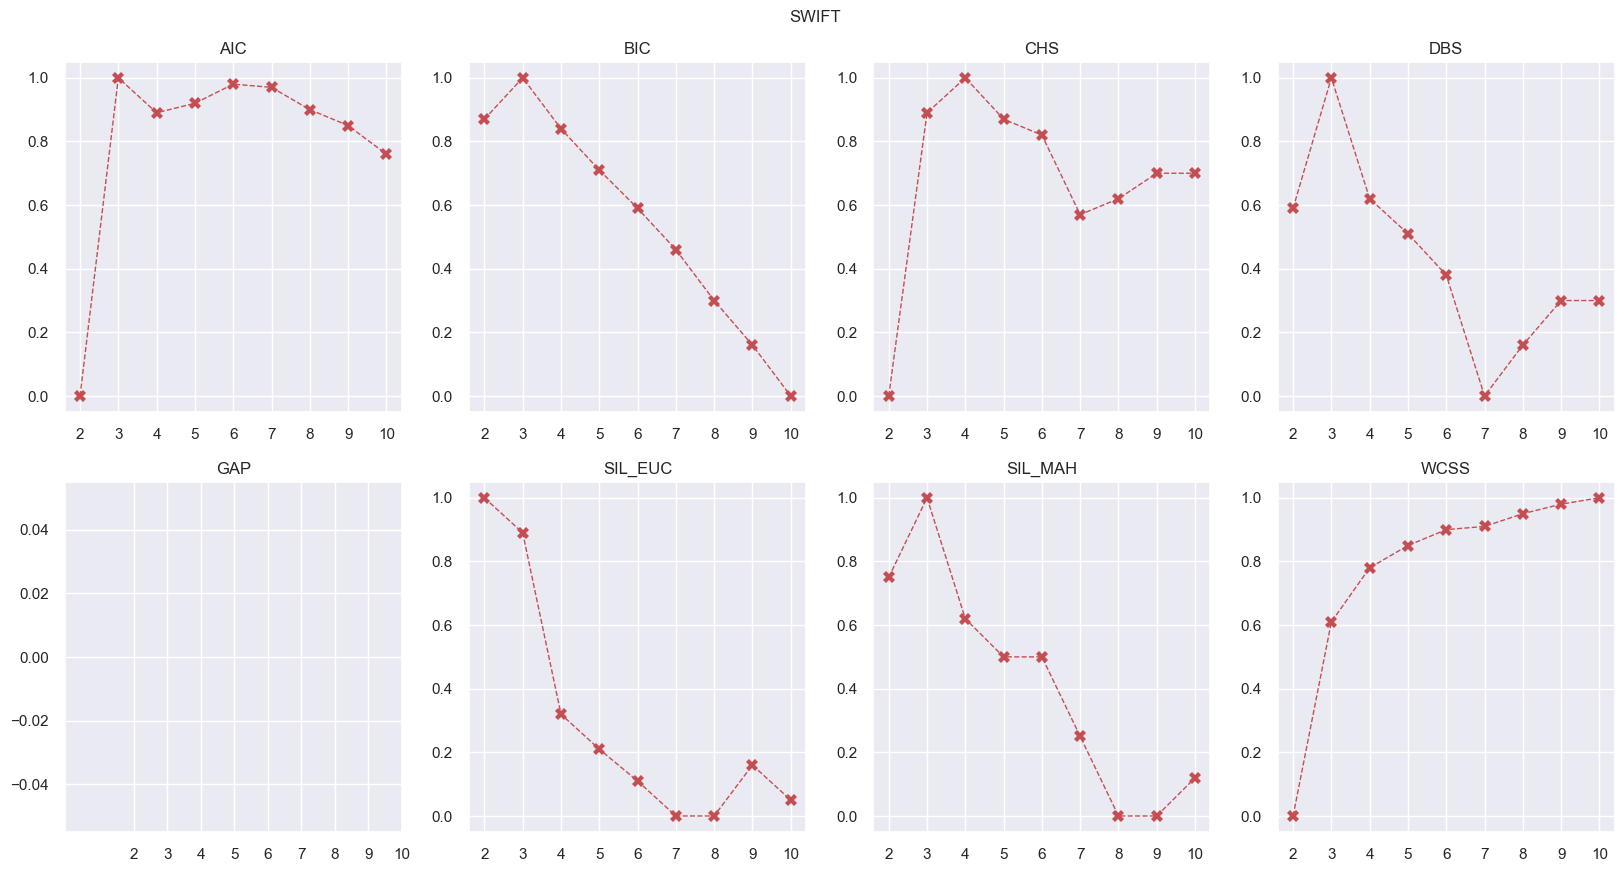

In [131]:
disp_operations.plot_scores_as_grid(normalized_scores, cat_swift)

Heatmap of the scores:

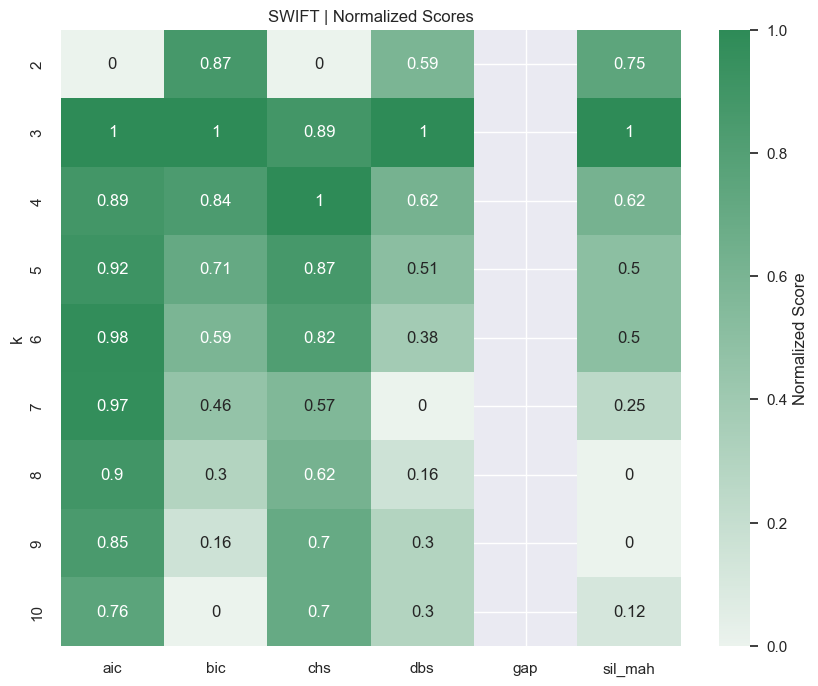

In [132]:
disp_operations.plot_heatmap(normalized_scores, cat_swift)

-----

-----

# CROSS-CATALOGUE ANALYSES

Model with 1 cluster:

::: Wasserstein Distance :::
   BATSE-FERMI BATSE-SWIFT FERMI-SWIFT
C1   0.03(0.0)   0.02(0.0)   0.02(0.0)


::: Jensen-Shannon Distance :::
   BATSE-FERMI BATSE-SWIFT FERMI-SWIFT
C1  0.08(0.01)  0.35(0.01)   0.4(0.01)


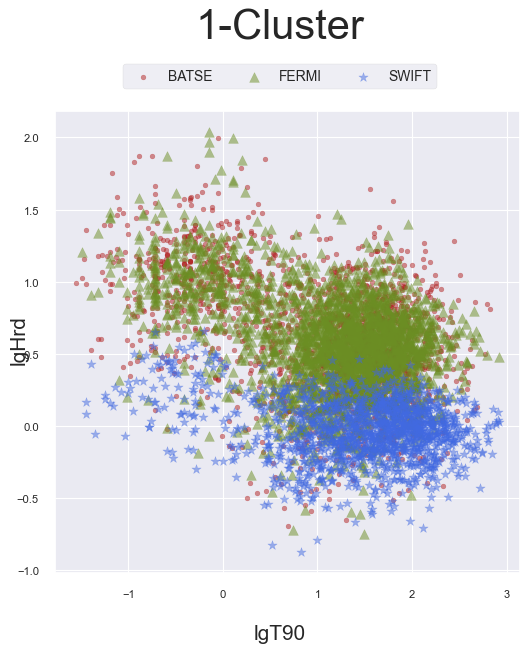

In [91]:
stats_operations.perform_cross_catalogue_comparison(feat_space=features.copy(), random_state=None, n_components=1, plot_catalogues=True)

Model with 2 clusters:

::: Wasserstein Distance :::
   BATSE-FERMI BATSE-SWIFT FERMI-SWIFT
C1   0.03(0.0)   0.1(0.01)  0.14(0.02)
C2   0.02(0.0)   0.02(0.0)   0.02(0.0)


::: Jensen-Shannon Distance :::
   BATSE-FERMI BATSE-SWIFT FERMI-SWIFT
C1  0.07(0.01)  0.25(0.01)  0.25(0.01)
C2  0.07(0.01)  0.43(0.01)  0.48(0.01)


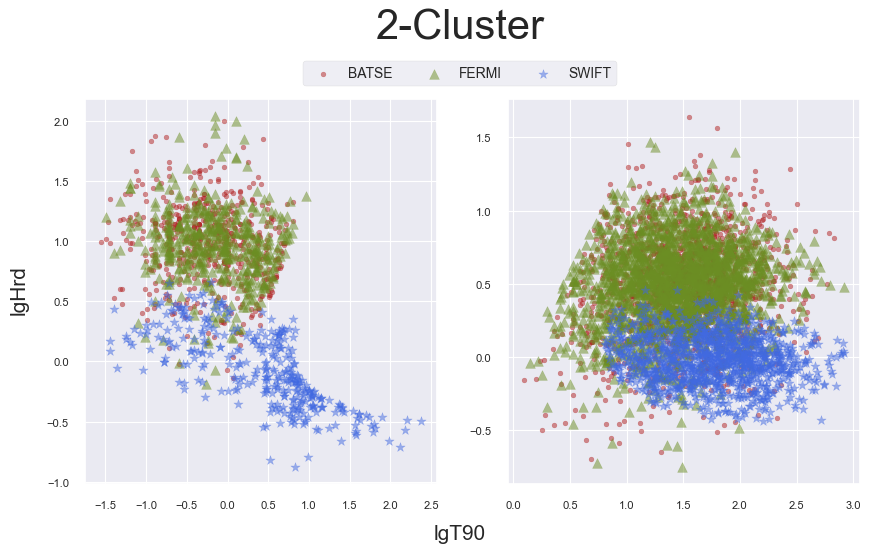

In [92]:
stats_operations.perform_cross_catalogue_comparison(feat_space=features.copy(), random_state=None, n_components=2, plot_catalogues=True)

::: Wasserstein Distance :::
   BATSE-FERMI BATSE-SWIFT FERMI-SWIFT
C1   0.04(0.0)  0.13(0.01)  0.14(0.01)
C2   0.05(0.0)   0.04(0.0)   0.02(0.0)
C3   0.01(0.0)   0.02(0.0)   0.02(0.0)


::: Jensen-Shannon Distance :::
   BATSE-FERMI BATSE-SWIFT FERMI-SWIFT
C1  0.08(0.02)  0.48(0.01)  0.47(0.01)
C2  0.17(0.01)  0.37(0.02)  0.35(0.01)
C3  0.13(0.01)  0.49(0.01)  0.53(0.01)


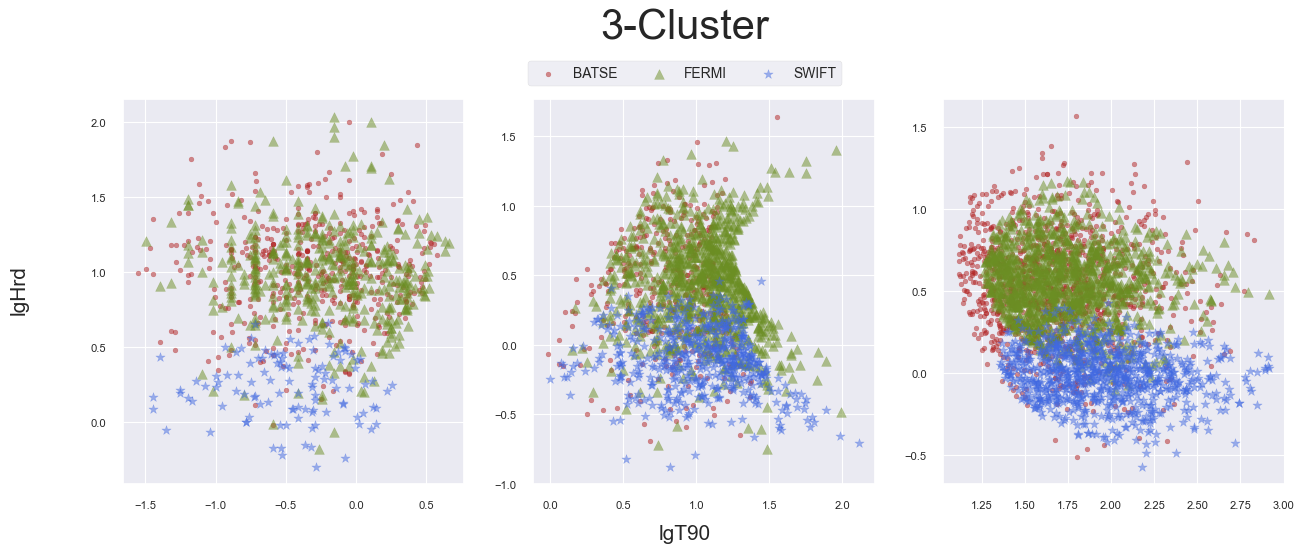

In [93]:
stats_operations.perform_cross_catalogue_comparison(feat_space=features.copy(), random_state=None, n_components=3, plot_catalogues=True)